### Import necessary libraries

In [67]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter
from PIL import Image

### Exploratory data analysis

#### Train dataset

In [68]:
data_path = '../app/data'
train_path = '../app/data/train'
csv_path = '../app/data'
csv_file = 'Train.csv'

In [69]:
# This function returns the total number of classes and also the number of images per class
def get_class_info():
    class_images_count = []
    
    for class_name in os.listdir(train_path):
        # Get number of files in folder
        num_of_files = len(os.listdir(os.path.join(train_path, class_name)))
        # Add to list
        class_images_count.append((int(class_name), num_of_files))
    
    class_count=len(class_images_count)
    class_names=dict(sorted(class_images_count, key=lambda x: x[0]))

    return class_count, class_names

In [70]:
class_count, class_images_count = get_class_info()

In [71]:
class_count

43

In [72]:
class_images_count

{0: 210,
 1: 2220,
 2: 2250,
 3: 1410,
 4: 1980,
 5: 1860,
 6: 420,
 7: 1440,
 8: 1410,
 9: 1470,
 10: 2010,
 11: 1320,
 12: 2100,
 13: 2160,
 14: 780,
 15: 630,
 16: 420,
 17: 1110,
 18: 1200,
 19: 210,
 20: 360,
 21: 330,
 22: 390,
 23: 510,
 24: 270,
 25: 1500,
 26: 600,
 27: 240,
 28: 540,
 29: 270,
 30: 450,
 31: 780,
 32: 240,
 33: 689,
 34: 420,
 35: 1200,
 36: 390,
 37: 210,
 38: 2070,
 39: 300,
 40: 360,
 41: 240,
 42: 240}

In [73]:
# This function return the total count of different images shapes
def get_shape_count():
    shapes = []
    
    for class_name in os.listdir(train_path):
        for filename in os.listdir(os.path.join(train_path, class_name)):
            img = cv2.imread(os.path.join(train_path, class_name, filename))
            shapes.append(img.shape)
    
    shape_count = Counter(shapes)
    shape_count = dict(sorted(shape_count.items(), key=lambda x: x[1], reverse=True))
    
    return shape_count

In [74]:
shape_count = get_shape_count()

In [75]:
shape_count

{(31, 31, 3): 396,
 (30, 30, 3): 380,
 (35, 35, 3): 360,
 (32, 32, 3): 352,
 (33, 33, 3): 351,
 (38, 38, 3): 345,
 (34, 34, 3): 339,
 (29, 29, 3): 338,
 (31, 30, 3): 337,
 (36, 36, 3): 334,
 (33, 32, 3): 326,
 (34, 33, 3): 318,
 (37, 37, 3): 310,
 (40, 40, 3): 297,
 (30, 29, 3): 297,
 (35, 34, 3): 280,
 (32, 31, 3): 276,
 (36, 35, 3): 273,
 (43, 43, 3): 265,
 (28, 28, 3): 263,
 (39, 39, 3): 262,
 (33, 34, 3): 262,
 (37, 36, 3): 262,
 (41, 41, 3): 259,
 (39, 38, 3): 249,
 (29, 28, 3): 247,
 (30, 31, 3): 243,
 (40, 39, 3): 238,
 (38, 37, 3): 229,
 (41, 40, 3): 229,
 (34, 35, 3): 229,
 (31, 32, 3): 228,
 (32, 33, 3): 222,
 (36, 37, 3): 210,
 (42, 42, 3): 210,
 (29, 30, 3): 204,
 (37, 38, 3): 199,
 (35, 36, 3): 196,
 (27, 27, 3): 194,
 (28, 27, 3): 193,
 (44, 44, 3): 188,
 (38, 39, 3): 183,
 (42, 41, 3): 177,
 (39, 40, 3): 174,
 (28, 29, 3): 173,
 (40, 41, 3): 161,
 (46, 46, 3): 161,
 (43, 42, 3): 160,
 (45, 45, 3): 158,
 (32, 30, 3): 158,
 (48, 48, 3): 156,
 (41, 42, 3): 147,
 (45, 44, 3)

In [76]:
# This function displays a random image from each class
def show_class_thumbnails():
    
    # Get CSV file
    csv = os.path.join(csv_path, csv_file)
    
    # Read CSV
    images_data = pd.read_csv(csv)
    
    # Get first image of each class
    selected_images = images_data.groupby('ClassId').first().reset_index()

    # Plot images 
    plt.figure(figsize=(10, 10))
    for i, row in selected_images.iterrows():
        img_path = os.path.join(data_path, row['Path'])
        img = Image.open(img_path)
        plt.subplot(7, 7, i+1)
        plt.imshow(img)
        plt.title(f"Class: {row['ClassId']}")
        plt.axis('off')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

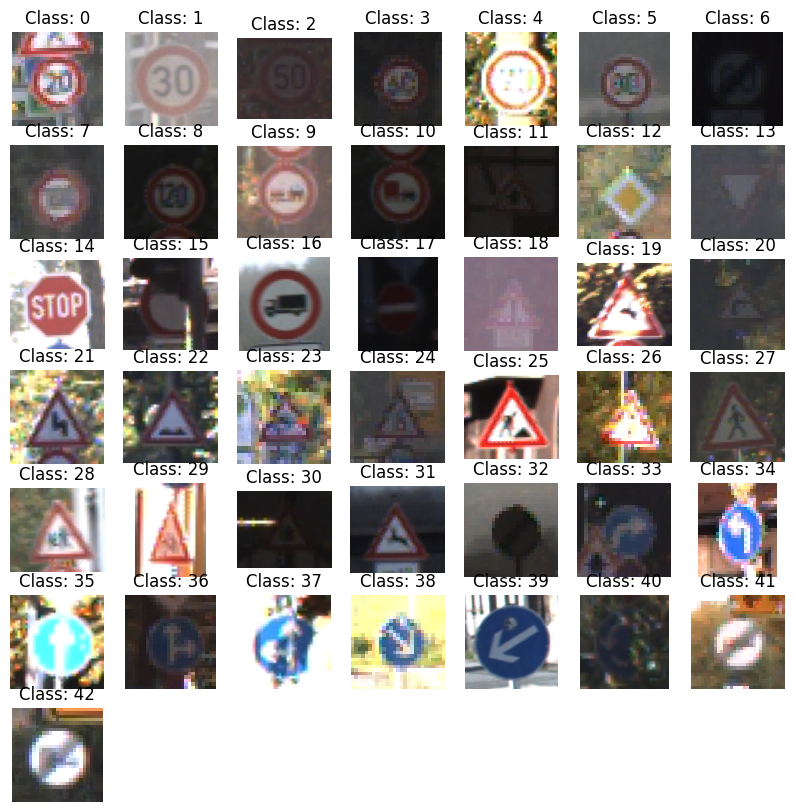

In [77]:
show_class_thumbnails()